**CHAPTER 9**

**ResNet-34 Model Hyperparameter Summary for Maize Leaf Disease Detection**


**Architecture Includes:**

Custom ResNet-34 architecture

Initial Conv Layer: 64 filters, 7x7, stride 2

Residual Blocks: 3, 4, 6, 3 blocks for filter sizes 64, 128, 256, 512

Final Dense Layer: 4 neurons with softmax activation (for 4-class classification)

**The model classifies images into 4 classes:**

Common Rust

Blight

Gray Leaf Spot

Healthy

**Dataset:**

Training images: 4141

Validation images: 516

Test images: 522

Image Size: 224 x 224

Number of Classes: 4

**Training Details:**

Optimizer: Adam

Learning Rate: Default (from Adam)

Loss Function: Categorical Crossentropy

Evaluation Metric: Accuracy

Epochs: 20

Batch Size: 40

**Total Number of Parameters:**

 Total params: 63,877,198 (243.67 MB)
 
 Trainable params: 21,286,724 (81.20 MB)
 
 Non-trainable params: 17,024 (66.50 KB)
 
 Optimizer params: 42,573,450 (162.40 MB)

**Performance:**

Final Training Accuracy: 94.11%

Final Validation Accuracy: 83.14%

Final Test Accuracy: 82.95%

**Tools & Libraries:**

TensorFlow / Keras for model development

Matplotlib and Seaborn for visualization

In [1]:

#  Full Custom ResNet-34 Pipeline in TensorFlow 

#import libraries

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
import random

2025-06-15 13:04:45.493207: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749992685.700489      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749992685.757643      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# ---------------------- 2. Load Data ----------------------
img_size = (224, 224)
batch_size =40
base_dir = "/kaggle/input/maize-leaf-dataset/split_dataset"

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(os.path.join(base_dir, 'train'), target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_gen = datagen.flow_from_directory(os.path.join(base_dir, 'val'), target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_gen = datagen.flow_from_directory(os.path.join(base_dir, 'test'), target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 4141 images belonging to 4 classes.
Found 516 images belonging to 4 classes.
Found 522 images belonging to 4 classes.


In [3]:

# ---------------------- 1. Define ResNet-34 ----------------------
def conv_block(x, filters, kernel_size=3, stride=1):
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    return layers.ReLU()(x)

def residual_block(x, filters, downsample=False):
    stride = 2 if downsample else 1
    shortcut = x

    x = layers.Conv2D(filters, 3, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    if downsample or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    return layers.ReLU()(x)

def make_layer(x, filters, blocks, downsample_first=True):
    x = residual_block(x, filters, downsample=downsample_first)
    for _ in range(1, blocks):
        x = residual_block(x, filters)
    return x

def build_resnet34(input_shape=(224, 224, 3), num_classes=4):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, 7, strides=2, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = make_layer(x, 64, 3, downsample_first=False)
    x = make_layer(x, 128, 4)
    x = make_layer(x, 256, 6)
    x = make_layer(x, 512, 3)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)


In [4]:

# ---------------------- 3. Train Model ----------------------
model = build_resnet34(input_shape=(224, 224, 3), num_classes=len(train_gen.class_indices))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_gen, validation_data=val_gen, epochs=20)

I0000 00:00:1749992701.971275      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1749992729.262903     115 service.cc:148] XLA service 0x7da14c45ce60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749992729.263938     115 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749992731.679876     115 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/104 ━━━━━━━━━━━━━━━━━━━━ 1:04:30 38s/step - accuracy: 0.3000 - loss: 1.5425

I0000 00:00:1749992741.594870     115 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/104 ━━━━━━━━━━━━━━━━━━━━ 76s 377ms/step - accuracy: 0.6480 - loss: 1.2636 - val_accuracy: 0.2481 - val_loss: 8.5899
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.8350 - loss: 0.4131 - val_accuracy: 0.2248 - val_loss: 4.1086
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 147ms/step - accuracy: 0.8748 - loss: 0.3463 - val_accuracy: 0.4380 - val_loss: 2.3530
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - accuracy: 0.8859 - loss: 0.3044 - val_accuracy: 0.7752 - val_loss: 0.6667
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 150ms/step - accuracy: 0.8784 - loss: 0.3169 - val_accuracy: 0.6531 - val_loss: 0.8672
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 148ms/step - accuracy: 0.9082 - loss: 0.2458 - val_accuracy: 0.6376 - val_loss: 2.0344
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 16s 148ms/step - accuracy: 0.9007 - loss: 0.2463 - val_accuracy: 0.3508 - val_loss: 55.6044
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.9006 - loss: 0.2353 - va

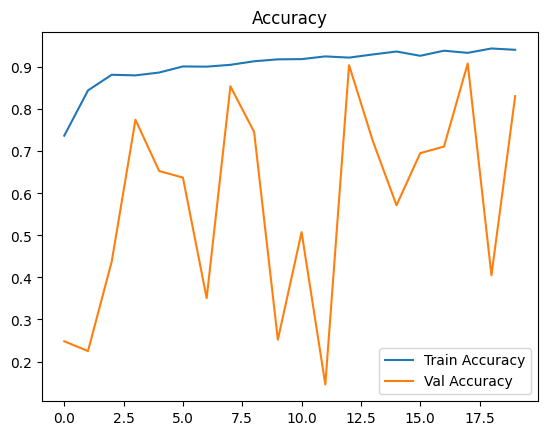

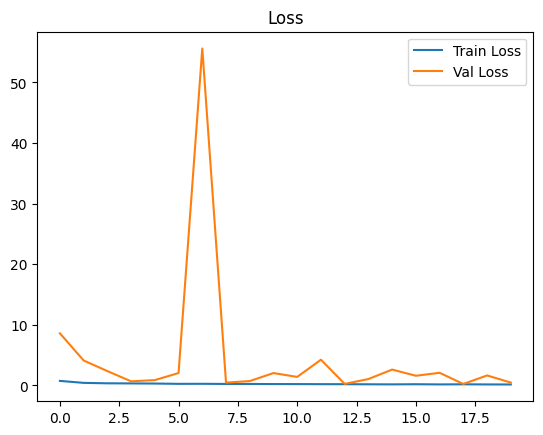

In [5]:

# ---------------------- 4. Plot Accuracy and Loss ----------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 112, 112, 64)   │          9,408 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 112, 112, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 112, 112, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 56, 56, 64)     │              0 │ re_lu[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 56, 56, 64)     │         36,864 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 56, 56, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 56, 56, 64)     │         36,864 │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 56, 56, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 56, 56, 64)     │         36,864 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 56, 56, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 56, 56, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 56, 56, 64)     │         36,864 │ re_lu_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 63,877,198 (243.67 MB)

 Trainable params: 21,286,724 (81.20 MB)

 Non-trainable params: 17,024 (66.50 KB)

 Optimizer params: 42,573,450 (162.40 MB)

We'll calculate the MACs (Multiply–Accumulate operations) for Conv2D and Dense layers. For simplicity:

Each Conv2D MAC = H × W × Cout × (Cin × K × K)

Each Dense MAC = Input × Output

FLOPs = 2 × MACs


**Model size (MB)=(Total Parameters×32) /  ( 8×1024×1024)**
 
Precision of each parameter (e.g., 32-bit float)

(Pooling, BatchNorm, ReLU, and Add layers are negligible in MACs and only add latency, not multiplications.)



**MACs per Conv2D Layer**

| **Layer Description**            | **Output Shape** | **Kernel** | **Input Channels** | **MACs (Approx)** |
| -------------------------------- | ---------------- | ---------- | ------------------ | ----------------- |
| Initial Conv2D (7×7, 64 filters) | 112 × 112 × 64   | 7×7        | 3                  | 118,013,952       |
| Residual Block 1 - Conv2D        | 56 × 56 × 64     | 3×3        | 64                 | 115,605,504       |
| Residual Block 2 - Conv2D 1      | 28 × 28 × 128    | 3×3        | 64                 | 57,802,752        |
| Residual Block 2 - Conv2D 2      | 28 × 28 × 128    | 3×3        | 128                | 115,605,504       |
| Residual Block 3 - Conv2D 1      | 14 × 14 × 256    | 3×3        | 128                | 57,802,752        |
| Residual Block 3 - Conv2D 2      | 14 × 14 × 256    | 3×3        | 256                | 115,605,504       |
| Residual Block 4 - Conv2D 1      | 7 × 7 × 512      | 3×3        | 256                | 57,802,752        |
| Residual Block 4 - Conv2D 2      | 7 × 7 × 512      | 3×3        | 512                | 115,605,504       |


| **Item**                      | **Value**         |
| ----------------------------- | ----------------- |
| Total parameters              | 63,877,198        |
| Bytes per parameter (float32) | 4 bytes           |
| Total memory (in bytes)       | 255,508,792 bytes |
| Total memory (in MB)          | \~243.67 MB       |



| **Component**    | **Count** | **Size**        |
| ---------------- | --------- | --------------- |
| Trainable Params | 21.29 M   | \~81.20 MB      |
| Non-trainable    | 17,024    | \~66.5 KB       |
| Optimizer States | 42.57 M   | \~162.40 MB     |
| **Total**        | 63.88 M   | **\~243.67 MB** |




14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 402ms/step


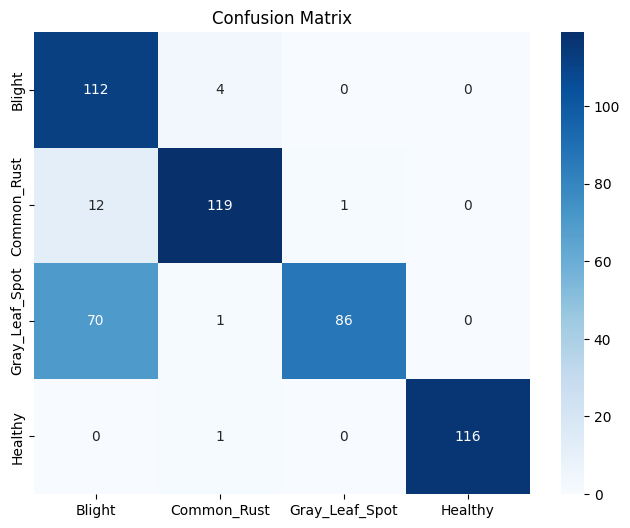

              precision    recall  f1-score   support

           0       0.58      0.97      0.72       116
           1       0.95      0.90      0.93       132
           2       0.99      0.55      0.70       157
           3       1.00      0.99      1.00       117

    accuracy                           0.83       522
   macro avg       0.88      0.85      0.84       522
weighted avg       0.89      0.83      0.83       522



In [7]:
# ---------------------- 5. Confusion Matrix ----------------------
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_gen.class_indices, yticklabels=test_gen.class_indices)
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes))

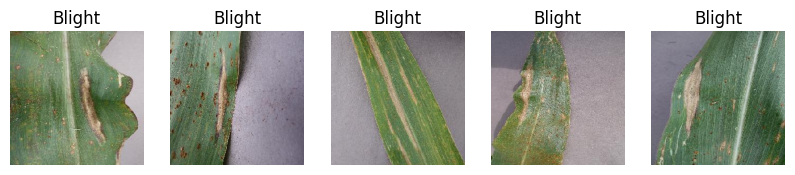

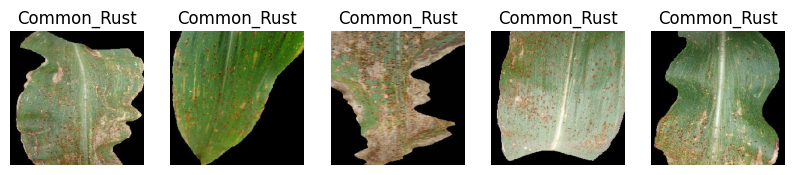

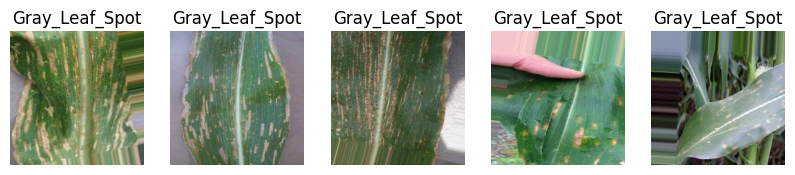

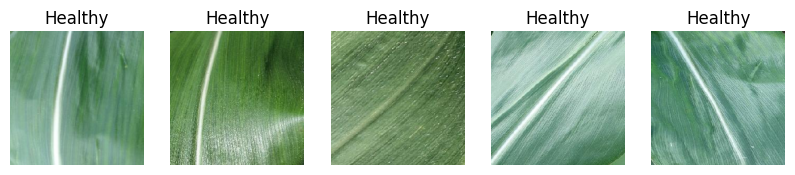

In [8]:
# ---------------------- 6. Show Sample Images ----------------------
class_names = list(test_gen.class_indices.keys())
for cls in class_names:
    cls_dir = os.path.join(base_dir, 'test', cls)
    images = random.sample(os.listdir(cls_dir), 5)
    plt.figure(figsize=(10, 2))
    for i, img_name in enumerate(images):
        img_path = os.path.join(cls_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(cls)
    plt.show()


In [9]:
# Print final training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print(f"✅ Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"✅ Final Validation Accuracy: {val_acc * 100:.2f}%")

# Evaluate on test dataset
test_loss, test_acc = model.evaluate(test_gen)

print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")


✅ Final Training Accuracy: 94.16%
✅ Final Validation Accuracy: 83.14%
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.8715 - loss: 0.3537
✅ Test Accuracy: 82.95%


In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_architecture.png')


In [11]:

# Training and validation accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")

# Test accuracy
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.8715 - loss: 0.3537
Test Accuracy: 0.8295


In [12]:
# ---------------------- 7. Save Model ----------------------
model.save("resnet34_custom.h5")
print("Model saved as resnet34_custom.h5")


Model saved as resnet34_custom.h5



Class: Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


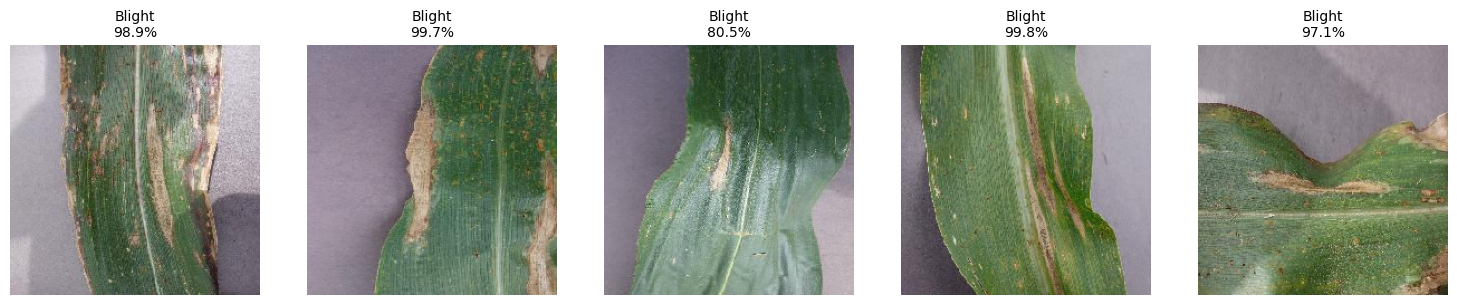


Class: Common_Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


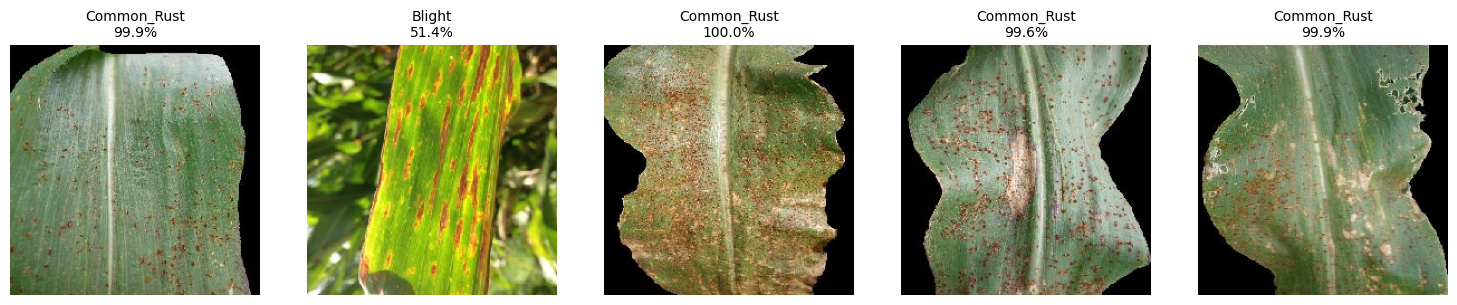


Class: Gray_Leaf_Spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


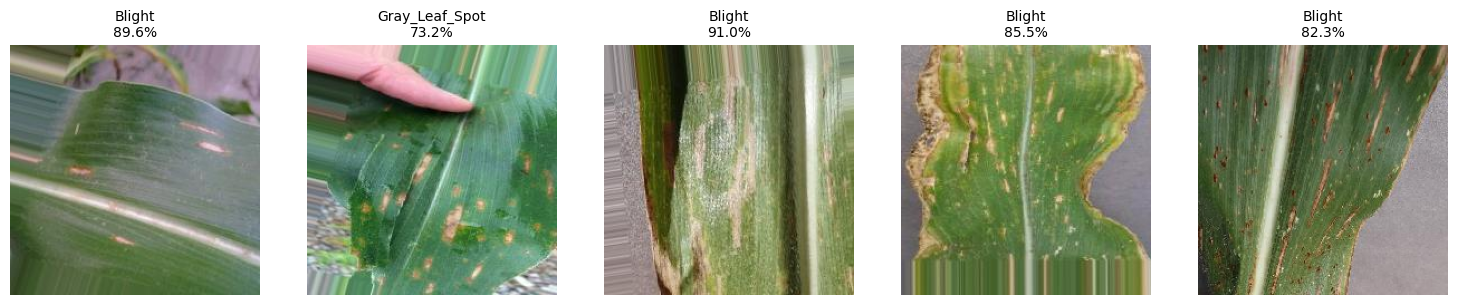


Class: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


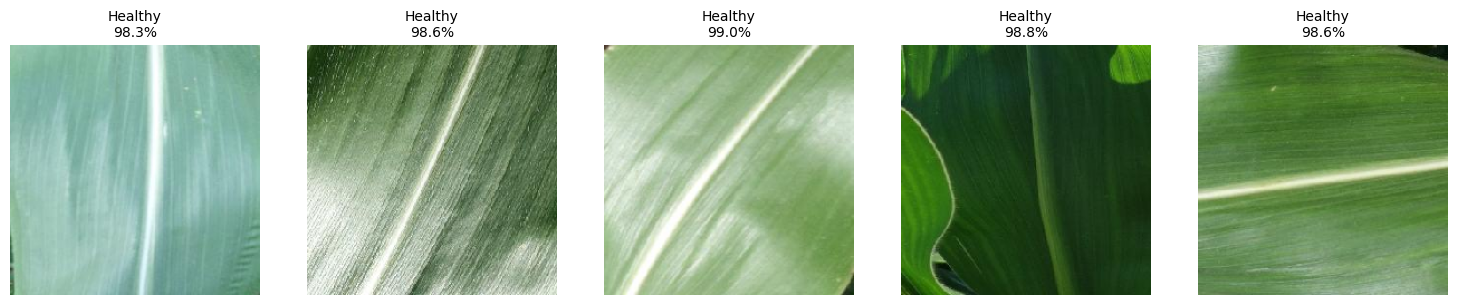

In [13]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths (change these if needed)
test_dir = '/kaggle/input/maize-leaf-dataset/split_dataset/test'    # Your test dataset folder
model_path = 'resnet34_custom.h5'            # Your trained model

# Load the model
model = load_model(model_path)

# Image size
img_size = (224, 224)

# Get class names from test folder
class_names = sorted(os.listdir(test_dir))

# Go through each class
for class_name in class_names:
    class_path = os.path.join(test_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    selected_images = random.sample(image_files, 5)  # Pick 5 random images

    print(f"\nClass: {class_name}")
    plt.figure(figsize=(15, 3))

    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(class_path, img_file)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)
        pred_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        # Show image and prediction
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{pred_class}\n{confidence:.1f}%', fontsize=10)

    plt.tight_layout()
    plt.show()
